# Clustering Transit-Rail Data
> _A Data Science project for an unsupervised machine learning capstone._

### David Booker-Earley
### 5/19/2020

---

# Introduction

#### Even during the ongoing pandemic, many essential workers rely on transportation services for a safe, relatively punctual commute. Public safety policies are evolving to mitigate the spread of the virus that causes _COVID-19_ (coronavirus disease 2019), like the _mandatory social distancing_ set in place to limit crowded areas. This, of course, indicates that transportation providers across the country are limiting the number of passengers that can board each bus and train.

Transportation resources could be more appropriately allocated if, especially for highly populated areas, more information was known about the following:
* Which days of the week are typically the busiest, and for which bus-route or rail-line?
* Which days typically have the most frequent and longest duration of bus or rail delays?
* How can data from previous years be used now to project the number of _in-service-vehicles_ needed during the pandemic?

Thus, in order for active workers to arrive at their jobs while complying with social distancing rules, it is indispensable for transportation services to have reliable, updated arrival and departure times; this is especially important to organize every unit of allowed passengers.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### The goal of this project is to apply unsupervised machine learning solutions to discover how rail-service-data can be grouped.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### This project will provide a basis for future prescriptive analysis, along with some insight into which days typically have the longest train delays; as such, the findings might be interesting to the following:

>_Chief executive officers, data scientists, machine learning enthusiasts, and anyone who is inherently inquisitive._

# Data Overview

NJ Transit is one of the nation's largest transportation providers. It connects people from New Jersey, New York, and Philadelphia using thousands of buses and trains. NJ Transit's operating units, along with those of other transportation providers, have been updating their services to comply with new protocols and procedures to fight the spread of COVID-19.

The **NJ Transit and Amtrak (NEC) Rail Performance** dataset from Kaggle, located [here](https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance), provides trip-level performance data for various months across the years 2018, 2019, and 2020.

Understanding how the data have changed over the last year could be beneficial; thus, as a first-step, data from April of 2019 will be used for this project. Further research is needed for April of 2020, which marks the first month after the World Health Organization characterized COVID-19 as a pandemic on March 11, 2020.

---

## Setup

In [0]:
import warnings
warnings.filterwarnings('ignore')


## Imports to load and explore the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import combinations


## Imports to (pre)process the data (model prep)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder


## Imports for the construction and analysis of machine learning models
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.neighbors import NearestNeighbors

In [0]:
## Settings & other preferences
%matplotlib inline
sns.set()

## Load and Preview Data


In [0]:
## Load and view data
link = "https://github.com/devid-davops/DS-Project-3/blob/master/2019_04.csv.zip?raw=true"
df = pd.read_csv(link, compression='zip')


df.info()
print("\n")
print("Variables:")
print(df.columns)
print("\n")
print("Data Preview:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238693 entries, 0 to 238692
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            238693 non-null  object 
 1   train_id        238693 non-null  object 
 2   stop_sequence   213163 non-null  float64
 3   from            238693 non-null  object 
 4   from_id         238693 non-null  int64  
 5   to              238693 non-null  object 
 6   to_id           238693 non-null  int64  
 7   scheduled_time  213163 non-null  object 
 8   actual_time     238693 non-null  object 
 9   delay_minutes   213163 non-null  float64
 10  status          238693 non-null  object 
 11  line            238693 non-null  object 
 12  type            238693 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 23.7+ MB


Variables:
Index(['date', 'train_id', 'stop_sequence', 'from', 'from_id', 'to', 'to_id',
       'scheduled_time', 'actual_time', 'dela

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-04-01,4393,1.0,Long Branch,74,Long Branch,74,2019-04-02 00:08:00,2019-04-02 00:07:06,0.000000,departed,No Jersey Coast,NJ Transit
1,2019-04-01,4393,2.0,Long Branch,74,Elberon,40,2019-04-02 00:12:00,2019-04-02 00:13:09,1.150000,departed,No Jersey Coast,NJ Transit
2,2019-04-01,4393,3.0,Elberon,40,Allenhurst,4,2019-04-02 00:16:00,2019-04-02 00:18:07,2.116667,departed,No Jersey Coast,NJ Transit
3,2019-04-01,4393,4.0,Allenhurst,4,Asbury Park,8,2019-04-02 00:20:00,2019-04-02 00:21:12,1.200000,departed,No Jersey Coast,NJ Transit
4,2019-04-01,4393,5.0,Asbury Park,8,Bradley Beach,22,2019-04-02 00:23:00,2019-04-02 00:23:10,0.166667,departed,No Jersey Coast,NJ Transit


In [0]:
# View the last several row-entries
df.tail()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
238688,2019-04-30,1629,5.0,Nanuet,100,Spring Valley,142,2019-04-30 18:25:00,2019-04-30 18:27:00,2.0,estimated,Pascack Valley,NJ Transit
238689,2019-04-30,A2124,NaN,Philadelphia,1,Philadelphia,1,NaN,2019-04-30 19:28:49,NaN,departed,ACELA EXPRESS,Amtrak
238690,2019-04-30,A2124,NaN,Philadelphia,1,Metropark,83,NaN,2019-04-30 20:16:23,NaN,departed,ACELA EXPRESS,Amtrak
238691,2019-04-30,A2124,NaN,Metropark,83,Newark Penn Station,107,NaN,2019-04-30 20:30:53,NaN,departed,ACELA EXPRESS,Amtrak
238692,2019-04-30,A2124,NaN,Newark Penn Station,107,New York Penn Station,105,NaN,2019-04-30 20:49:04,NaN,departed,ACELA EXPRESS,Amtrak


In [0]:
print("Number of total unique entries:")
print(f"*  {df['date'].nunique()} Days")
print(f"*  {df['train_id'].nunique()} Trains")
print(f"*  {df['type'].nunique()} Service Types")
print()
print("Number of unique entries per Service Type:")
print(df['type'].value_counts())

Number of total unique entries:
*  30 Days
*  1241 Trains
*  2 Service Types

Number of unique entries per Service Type:
NJ Transit    226144
Amtrak         12549
Name: type, dtype: int64


In [0]:
## Are there any missing values?
# Missing values can also be confirmed by viewing the "df.info()" results.
any_nans = df.isna().any(axis=None)

print("Are there any missing (NULL or NAN) values anywhere?")
if any_nans:
  print("Yes, here are the details for each variable:")
  print(df.isna().any(axis=0))
else:
  print(any_nans)

Are there any missing (NULL or NAN) values anywhere?
Yes, here are the details for each variable:
date              False
train_id          False
stop_sequence      True
from              False
from_id           False
to                False
to_id             False
scheduled_time     True
actual_time       False
delay_minutes      True
status            False
line              False
type              False
dtype: bool


### Important Observations

* There are $13$ columns and over $200,000$ trip-entries that span over the entire month of April (2019).
* Some values are missing for three variables.
* The set consists of continuous, time-based data, along with categorical, text-based data.
* The date-time values for `scheduled_time` and `actual_time` will be preserved to improve the opportunities of date-based, rather than hour-based, grouping by the clustering algorithms.

# Methods

## 1) Preparation

_This section implements an iterative process involving data cleaning, data exploration, and feature selection._
* Exploratory data analysis (EDA)
* Feature engineering

In [0]:
rail_data = df.copy()

### Account for Missing Values & Outliers

In [0]:
# Calculate % of NANs for each variable: (NANs / Total) * (100 %)
# Get a list of the variables with NANs.
na_percent = rail_data.isna().sum() / rail_data.isna().count() * 100
na_cols = list(na_percent[na_percent > 0].index)

print(f"{len(na_cols)} variable(s) with NANs:")
print(na_cols)
print(rail_data[na_cols].isna().sum())
print()
print("Calculated percent % of missing values for each variable:")
print(na_percent[na_cols])
print()
print("Data Types:")
rail_data[na_cols].dtypes

3 variable(s) with NANs:
['stop_sequence', 'scheduled_time', 'delay_minutes']
stop_sequence     25530
scheduled_time    25530
delay_minutes     25530
dtype: int64

Calculated percent % of missing values for each variable:
stop_sequence     10.695747
scheduled_time    10.695747
delay_minutes     10.695747
dtype: float64

Data Types:


stop_sequence     float64
scheduled_time     object
delay_minutes     float64
dtype: object

#### How many records have `NANs` for each `Service Type`?

In [0]:
nan_data = rail_data[rail_data.isna().any(axis=1)]

nan_data = nan_data[na_cols+['type']]

nan_data.info()
print()
nan_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25530 entries, 29 to 238692
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_sequence   0 non-null      float64
 1   scheduled_time  0 non-null      object 
 2   delay_minutes   0 non-null      float64
 3   type            25530 non-null  object 
dtypes: float64(2), object(2)
memory usage: 997.3+ KB



,stop_sequence,scheduled_time,delay_minutes,type
29,NaN,NaN,NaN,NJ Transit
30,NaN,NaN,NaN,NJ Transit
31,NaN,NaN,NaN,NJ Transit
32,NaN,NaN,NaN,NJ Transit
33,NaN,NaN,NaN,NJ Transit


In [0]:
nan_data.tail()

,stop_sequence,scheduled_time,delay_minutes,type
238506,NaN,NaN,NaN,Amtrak
238689,NaN,NaN,NaN,Amtrak
238690,NaN,NaN,NaN,Amtrak
238691,NaN,NaN,NaN,Amtrak
238692,NaN,NaN,NaN,Amtrak


In [0]:
print("How many records have NANs for each Service Type?")
nan_data['type'].value_counts()

How many records have NANs for each Service Type?


NJ Transit    12981
Amtrak        12549
Name: type, dtype: int64

Both `Amtrak` and `NJ Transit` have between $12,500$ and $13,000$ trips with missing data.



In total, there are $25,530$ trips with `NANs`, which exist across the same three variables: `stop_sequence`, `scheduled_time`, and `delay_minutes`.
* Each variable is missing approximately $10.7$% of its values.
* This might be the result of several situations, including the following:
  * Schedules could have been modified due to unforeseen issues.
  * The data might have been unavailable during the time of collection.
  * Some trains that were previously _out-of-service_ could have been integrated to alleviate overcrowded stops.

. . . . . . . . . .

This is a manageable amount of empty values; however, several trips are consecutive entries, including the last several trips; this could be problematic for interpolating reliable values.
* While assumptions could be made, there isn't enough information to accurately impute missing values for each of these time-stamped variables without knowing the `scheduled time` or `delayed time`.
* Including the known data from these trips across the other variables could still be beneficial when applying the clustering algorithms.
* However, values for the main feature in question, `delay_minutes`, are missing; filling these values improperly might accidentally skew the data.

. . . . . . . . . .

The unsupervised learning algorithms attempt to group similar data, which should inherently account for missing data and outlier-noise.
* However, some parameters and the descriptive statistics of categorical variables might be affected by the presence of `NANs / unknowns`.
* While an assumption can be made that missing values and outliers will not significantly obstruct the clustering algorithms, the trips with `NANs` will be dropped while outliers will be ignored for this application.


<!-- * Thus, the following will be done to maintain the integrity of the data provided:
  * `NANs` for `stop_sequence` and `scheduled_time` could be filled with an `unknown` category.
  * `delay_minutes` will be filled with a value of $999$, which could be addressed in later steps as outlier-noise. -->

In [0]:
rail_data = rail_data.dropna()

In [0]:
print(f"Old shape: {df.shape}")
print(f"New shape: {rail_data.shape}")
print()
print("Now, are there any missing (NULL or NAN) values anywhere?")
print(rail_data.isna().any(axis=None))

Old shape: (238693, 13)
New shape: (213163, 13)

Now, are there any missing (NULL or NAN) values anywhere?
False


In [0]:
rail_data.nunique()

date                  30
train_id             998
stop_sequence         26
from                 156
from_id              156
to                   156
to_id                156
scheduled_time     37851
actual_time       150331
delay_minutes       2012
status                 3
line                  10
type                   1
dtype: int64

In [0]:
rail_data['type'].value_counts()

NJ Transit    213163
Name: type, dtype: int64

All `Amtrak` trips contained missing values, which is why `type` now only has one unique value, `NJ Transit`.

The variable names will now be stored based on their data-type.

In [0]:
numerical_names = list(
    rail_data.select_dtypes(['float64', 'int64']).columns
)

object_names = list(
    rail_data.select_dtypes(['object']).columns
)

print(f"{len(numerical_names)} Numerical Features:\n{numerical_names}")
print()
print(f"{len(object_names)} Categorical Features:\n{object_names}")

4 Numerical Features:
['stop_sequence', 'from_id', 'to_id', 'delay_minutes']

9 Categorical Features:
['date', 'train_id', 'from', 'to', 'scheduled_time', 'actual_time', 'status', 'line', 'type']


## Exploration

### How late were the trains?

In [0]:
print("Descriptive Stats for Numerical Data")
rail_data.describe()

Descriptive Stats for Numerical Data


,stop_sequence,from_id,to_id,delay_minutes
count,213163.000000,213163.000000,213163.000000,213163.000000
mean,8.200063,4424.110446,4411.009275,3.697638
std,5.108761,12011.585253,11995.177272,4.768392
min,1.000000,3.000000,3.000000,0.000000
25%,4.000000,62.000000,62.000000,1.100000
50%,8.000000,105.000000,105.000000,2.350000
75%,12.000000,138.000000,138.000000,4.916667
max,26.000000,43599.000000,43599.000000,163.000000


In [0]:
print("Descriptive Stats for Categorical Data")
rail_data.describe(include='O')

Descriptive Stats for Categorical Data


,date,train_id,from,to,scheduled_time,actual_time,status,line,type
count,213163,213163,213163,213163,213163,213163,213163,213163,213163
unique,30,998,156,156,37851,150331,3,10,1
top,2019-04-12,1087,New York Penn Station,New York Penn Station,2019-04-22 18:04:00,2019-04-23 19:04:08,departed,Morristown Line,NJ Transit
freq,8473,572,7722,7705,19,28,193744,35612,213163


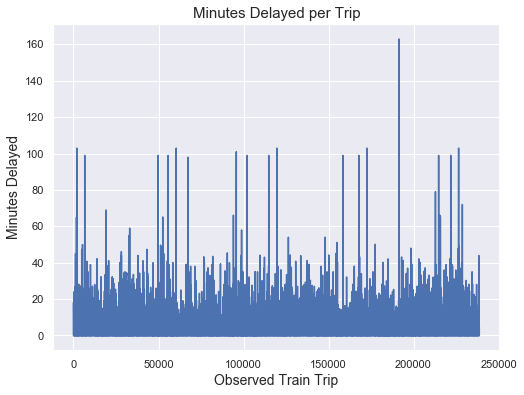

In [0]:
plt.figure(figsize=(8,6))
plt.plot(rail_data['delay_minutes'])
plt.xlabel('Observed Train Trip', fontsize=14)
plt.ylabel('Minutes Delayed', fontsize=14)
plt.title("Minutes Delayed per Trip", fontsize=15)

plt.show();

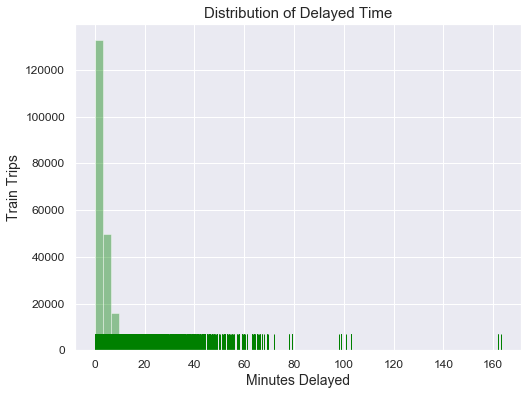

In [0]:
plt.figure(figsize=(8,6))
ax = sns.distplot(
    rail_data['delay_minutes'],
    kde=False,
    rug=True,
    color='green',
)
ax.tick_params(axis='both', labelsize='medium')
plt.xlabel('Minutes Delayed', fontsize=14)
plt.ylabel('Train Trips', fontsize=14)
plt.title("Distribution of Delayed Time", fontsize=15)

plt.show();

The descriptive statistics outline specific details that are shown by the large, relatively rare time-spikes in the first figure, as well as the low density of tick-marks near $160$ minutes compared to $15$ minutes in the distribution plot.
* The most that any trip had been delayed was $163$ minutes, which was for only one trip.
* There were several trips delayed by approximately $100$ minutes.
* However, the average delay was under $4$ minutes.
* These results could've been caused by public events or significant rail-emergencies (accidents or malfunctions).

### On average, which day of the week had the longest delay?

`Date` corresponds to the 30 days in April of 2019, but doesn't conveniently describe train delays with respect to each day of the week.
* Thus, each value of the `date` variable will now be transformed to reflect the corresponding day of the week.
* This transformation will occur for Monday, April $1^{st}$ through Tuesday, April $30^{th}$.

In [0]:
## Assume that the dates may not be sorted.
# From 1 to 30 (inclusive), map the dates to the 7 days of the week.
dates = list(rail_data['date'].value_counts().sort_index().index)
days = ['Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.']
dates_and_days = {date:days[i%7] for (i,date) in enumerate(dates,1)}
rail_data['date'] = rail_data['date'].replace(dates_and_days)


print("Descriptive Statistics:")
print(rail_data['date'].describe(include='O'))
print()
print("Preview head of updates:")
rail_data.head(2)

Descriptive Statistics:
count     213163
unique         7
top         Mon.
freq       41571
Name: date, dtype: object

Preview head of updates:


,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,Mon.,4393,1.0,Long Branch,74,Long Branch,74,2019-04-02 00:08:00,2019-04-02 00:07:06,0.00,departed,No Jersey Coast,NJ Transit
1,Mon.,4393,2.0,Long Branch,74,Elberon,40,2019-04-02 00:12:00,2019-04-02 00:13:09,1.15,departed,No Jersey Coast,NJ Transit


In [0]:
print("Preview tail of updates:")
rail_data.tail(2)

Preview tail of updates:


,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
238687,Tue.,1629,4.0,Pearl River,118,Nanuet,100,2019-04-30 18:20:00,2019-04-30 18:23:41,3.683333,departed,Pascack Valley,NJ Transit
238688,Tue.,1629,5.0,Nanuet,100,Spring Valley,142,2019-04-30 18:25:00,2019-04-30 18:27:00,2.000000,estimated,Pascack Valley,NJ Transit


In [0]:
print("Number of observations per unique value:")
rail_data['date'].value_counts()

Number of observations per unique value:


Mon.    41571
Tue.    39864
Fri.    33311
Wed.    33203
Thu.    31916
Sat.    16817
Sun.    16481
Name: date, dtype: int64

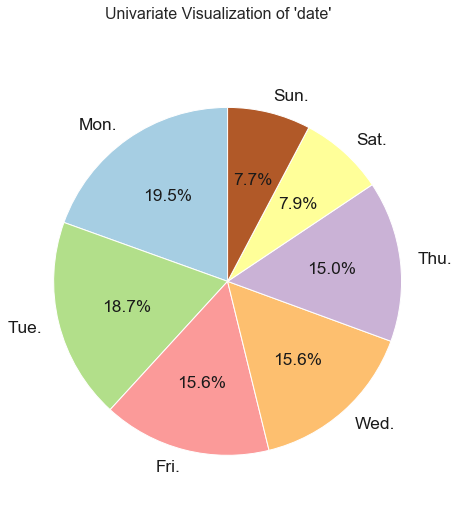

In [0]:
## Univariate Visualization
# Visualize the "spread" of Categorical Variables
target = 'date'

plt.figure(figsize=(10,8))
plt.suptitle(f"Univariate Visualization of '{target}'", fontsize=16)

textprops = {'size': 'x-large',
             'color': 'k',}

# Pie Chart of the Target
(rail_data[target]
 .value_counts()
 .plot
 .pie(autopct='%1.1f%%',
     startangle=90,
     textprops=textprops,
     cmap='Paired'))

plt.xlabel('')
plt.ylabel('')

plt.show();

The dataset consists mostly of weekday trips.
* `Monday` was the most represented weekday, accounting for approximately $20$% of the data.
* `Tuesday` was the second most represented weekday (~ $19$%).
* `Thursday` was the least represented weekday (~ $15$%).
* The combined percentage of `Saturday` and `Sunday` is near that of the remaining two days.

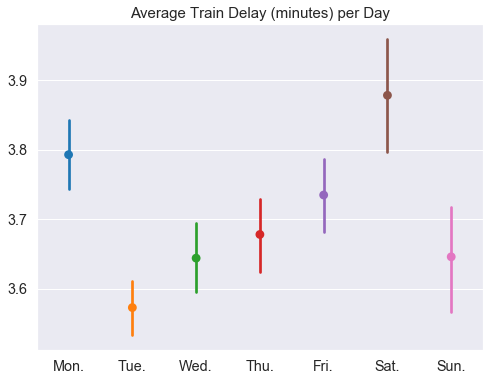

In [0]:
plt.figure(figsize=(8,6))
ax = sns.pointplot(
    x='date',
    y='delay_minutes',
    data=rail_data,
    palette='tab10',
)
ax.tick_params(axis='both', labelsize='large')
plt.xlabel('')
plt.ylabel('')
plt.title("Average Train Delay (minutes) per Day", fontsize=15)

plt.show();

On average,
* `Saturday` had the longest train delay at approximately $3.90$ minutes.
* Following that was `Monday` at nearly $3.80$ minutes.
* `Friday` had the third highest delay, estimated at $3.74$ minutes.
* `Tuesday` had the smallest delay, estimated at $3.60$ minutes.

## Feature Engineering

### Convert from `categorical` to `numerical` equivalents

The learning models will expect numerical data.
* Thus, before the modeling phase, categorical variables that will be used as _model features_ should be updated.

In [0]:
print("Number of categories per categorical variable:")
print()
rail_data[object_names].nunique()

Number of categories per categorical variable:



date                   7
train_id             998
from                 156
to                   156
scheduled_time     37851
actual_time       150331
status                 3
line                  10
type                   1
dtype: int64

The clustering algorithms need to identify underlying patterns by equally considering the different variables.

As such, the categorical variables will be encoded with different methods based on the quantity of unique labels.
* _One-hot-encoding_ could be applied on `type` because there were initially two unique values.
  * However, after dropping the missing values, `type` only contains `NJ Transit`, which makes this column a constant.
  * Thus, `type` will be dropped from the feature set.
* _Label-encoding_ will be applied on the others to keep values under their respective variables.
  * This will also minimize the overall complexity of the feature-set.

In [0]:
feature_data = rail_data.copy()

Without randomly sampling or shuffling the input to the clustering algorithm:
* The _row-index_ for each _cluster-labeled_ observation (done later) should map to its corresponding record in the dataset.
* Thus, storing the feature in question (like `date`) is needed for visualization purposes later.

In [0]:
date_data = feature_data['date']

In [0]:
def one_hot_enc(col, df, dummy_names):
  """
  Convert categorical variables into numerical data
  using one hot encoding through 'get_dummies'.
  
  The df is updated with the new dummy columns.
  
  The list of dummy column names is also updated.
  """
  
  df = pd.concat([df,
                  pd.get_dummies(df[col],
                                 prefix=col,
                                 drop_first=True)],
                 axis=1)
  
  dummy_names += list(pd.get_dummies(df[col],
                                     prefix=col,
                                     drop_first=True).columns)
  
  return df

In [0]:
object_names.remove('type')
dummy_column_names = list()


## One hot encode
feature_data = one_hot_enc(
    col='type',
    df=feature_data,
    dummy_names=dummy_column_names
)
feature_data.drop(columns=['type'], inplace=True)


## Label encode
label_enc = LabelEncoder()
for f in object_names:
  feature_data[f] = label_enc.fit_transform(feature_data[f].astype(str))


## Preview results
print(f"{len(dummy_column_names)} dummy column(s):")
print(dummy_column_names)
print()
print(f"Old DataFrame Shape: {rail_data.shape}")
print(f"New DataFrame Shape: {feature_data.shape}")
print()
feature_data.info()
print()
feature_data.head()

0 dummy column(s):
[]

Old DataFrame Shape: (213163, 13)
New DataFrame Shape: (213163, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213163 entries, 0 to 238688
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            213163 non-null  int32  
 1   train_id        213163 non-null  int32  
 2   stop_sequence   213163 non-null  float64
 3   from            213163 non-null  int32  
 4   from_id         213163 non-null  int64  
 5   to              213163 non-null  int32  
 6   to_id           213163 non-null  int64  
 7   scheduled_time  213163 non-null  int32  
 8   actual_time     213163 non-null  int32  
 9   delay_minutes   213163 non-null  float64
 10  status          213163 non-null  int32  
 11  line            213163 non-null  int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 14.6 MB



,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line
0,1,636,1.0,62,74,62,74,1187,5810,0.000000,1,5
1,1,636,2.0,62,74,31,40,1191,5830,1.150000,1,5
2,1,636,3.0,31,40,2,4,1195,5845,2.116667,1,5
3,1,636,4.0,2,4,5,8,1199,5854,1.200000,1,5
4,1,636,5.0,5,8,16,22,1202,5859,0.166667,1,5


### Correlation Visualization

To maximize clustering performance, the _input-features_ should represent different aspects of the data when explaining variance.
* Variables like `to` and `to_id` explain the same destinations; similarly, `from` and `from_id` outline the same previously visited train stops.
* Thus, the features of each pair might be highly correlated and describe the same variance in the data.

An overlap or duplication in explained variance might exist elsewhere; thus, the following _heat map_ illustrates **inter-feature correlations**.
* $\mathbf{\color{lightblue}{\text{Low (possibly negative) correlations are shown in shades of blue.}}}$
* $\mathbf{\color{orange}{\text{Highly positive correlations are shown in shades of red or orange.}}}$


<!-- 
---

* <span style='background :black' > $\color{lightblue}{\text{Low (possibly negative) correlations are shown in shades of blue.}}$ </span>
* <span style='background :black' > $\color{orange}{\text{Highly positive correlations are shown in shades of red or orange.}}$
</span>

* $\color{lightblue}{\text{Low (possibly negative) correlations are shown in shades of blue.}}$
* $\color{orange}{\text{Highly positive correlations are shown in shades of red or orange.}}$
 -->

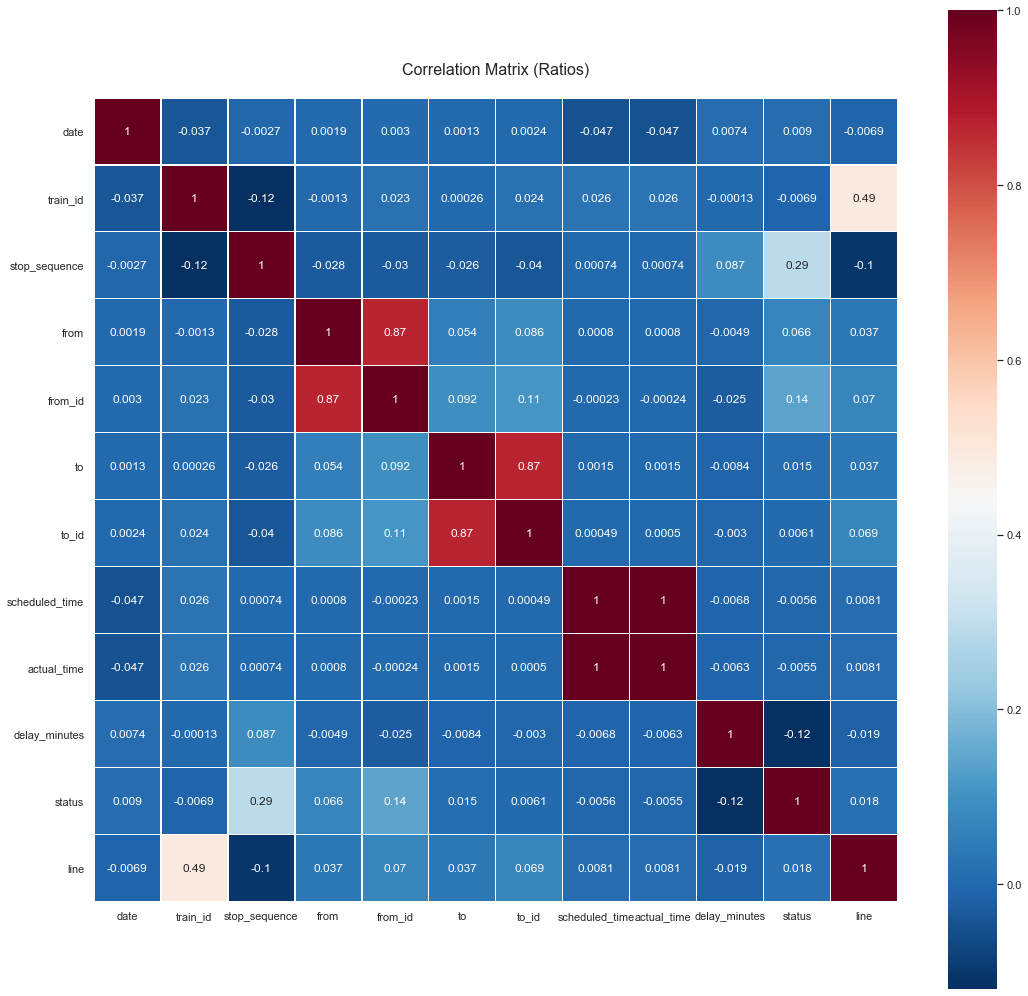

In [0]:
plt.figure(figsize=(18,18))
sns.heatmap(feature_data.corr(method='spearman'),
            square=True,
            annot=True,
            linewidths=.5,
            cmap='RdBu_r')  # good color palettes: BrBG, coolwarm, RdBu_r
plt.title("Correlation Matrix (Ratios)\n", fontsize=16)
plt.show();

As expected, each pair of the duplicated, destination-based features have correlations over $85$%.
* Thus, only `from_id` and `to_id`, which are already numerical, are needed to describe **trip destinations**.
* The other two, which are categorical, will be dropped from the feature set.


Also, `scheduled_time` and `actual_time` are highly correlated (over $85$%), but they describe different aspects of the data.
* Similar to the comparison of **experimental data** and **theoretical values**, the difference between these two features are represented by `delay_minutes`, which has a negligible correlation with the other two.
* Thus, these features will be used in order to explain underlying patterns.

>The observed collinearity could also be accounted for with `PCA`. However, considering the descriptions and quantity of these variables, feature selection by-hand is sufficient. Instead, `PCA` will be used in a later step to visualize clusters in 2-Dimensions.

In [0]:
feature_data = feature_data.drop(columns=['from', 'to'])

print(f"New Dimensions: {feature_data.shape}")
feature_data.head(2)

New Dimensions: (213163, 10)


,date,train_id,stop_sequence,from_id,to_id,scheduled_time,actual_time,delay_minutes,status,line
0,1,636,1.0,74,74,1187,5810,0.00,1,5
1,1,636,2.0,74,40,1191,5830,1.15,1,5


### Standardization

The numerical features (excluding the encoded categorical variables) have different units or scales.
* Some clustering algorithms might be sensitive to the scale of the data.
* Thus, to treat each variable equally, numerical features will now be standardized.

In [0]:
## Standardize features and convert to array
# Avoid transforming the encoded categorical variables
vars_to_stdz = sorted(numerical_names)
X_a = StandardScaler().fit_transform(feature_data[vars_to_stdz])


## Convert others to an array and join with the STDZ vars
not_stdz = [v for v in set(feature_data.columns) - set(vars_to_stdz)]
X_b = np.array(feature_data[not_stdz], dtype=float)
X_std = np.concatenate((X_a, X_b), axis=1)

## 2) Instantiate Unsupervised Learning Models

## `DBSCAN`

>Density-Based Spatial Clustering of Applications with Noise

This algorithm has been chosen because of its ability to identify clusters despite their shape.
* `DBSCAN` forms a shape (neighborhood) around each observation point in the featured dataset.
* Then, it counts the points existing in that shape to determine if it can sufficiently be considered a cluster.

. . . . . . . . . .


`eps`
>Epsilon represents the radius which outlines the immediate neighborhood when searching for neighbors. To determine the epsilon parameter, the _elbow_ approach will be used.


`min_samples`
>The `min_samples` parameter represents the minimum number of neighboring points (within the border formed by `eps`) needed to form a cluster; this will be tuned through a simple _trial-and-error_ approach.

In [0]:
X_std.shape

(213163, 10)

In [0]:
# Set n_neighbors to "1 + col_dimension" to account for all model features
neigh = NearestNeighbors(n_neighbors=12, n_jobs=-1)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

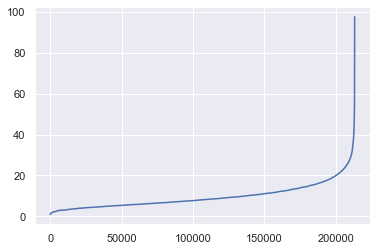

In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

The sharp, first elbow has an `eps` value of $0$ and doesn't account for most of the observations.

The curved, second elbow near $eps=20$ accounts for most observations ($>200k$) and shows the ideal range of `eps` values.
* Values that will be tried: 17, 20, 22, 25

In [0]:
def print_cluster_details(X, cluster_labels):
  """Displays cluster count, noise count, and Silhouette score."""
  n_c = len(set(labels)) - (1 if -1 in labels else 0)
  print(f"Estimated number of clusters (excluding noise): {n_c}")
  print(f"Number of samples marked as noise: ", end='')
  print(list(cluster_labels).count(-1))
  print(f"Clusters (noise labeled as -1): {np.unique(cluster_labels)}")
  print('*' + ' *'*30)
  print("Silhouette score: ", end='')
  print(silhouette_score(X, cluster_labels, metric='euclidean'))

In [0]:
def plot_clusters(data, algorithm, args, kwds):
  """Displays clusters generated by algorithm and the runtime."""
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)  # access seaborn palette
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors)#, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  # plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
  ## Update to show text atop figure without obstruction
  plt.suptitle(f'Clusters found by {str(algorithm.__name__)}', fontsize=16)
  plt.title(f'Clustering took {end_time-start_time :.2f} s', fontdict={'weight': 'bold', 'size': 12})
  # plt.show();

### `eps` = 17

#### `min_samples` = 12

In [0]:
eps = 17
min_samples = 12

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=min_samples,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}, min_samples={min_samples}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=17, min_samples=12
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 172
Number of samples marked as noise: 210341
Clusters (noise labeled as -1): [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171]
* * * * * * * * * * * * * * * * * * * * * * * * 

For $eps = 17,\ min\_samples = 12$,
* There were $172$ clusters (excluding noise), but most of the observations were labeled as noise ($>200k$).
* The Silhouette score was $-0.96$.

Overall, this implementation performed poorly, but these results indicate that there should be less than $172$ clusters.

#### `min_samples` = 22

In [0]:
eps = 17
min_samples = 22

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=min_samples,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}, min_samples={min_samples}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=17, min_samples=22
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 3
Number of samples marked as noise: 213085
Clusters (noise labeled as -1): [-1  0  1  2]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.608551654564144


For $min\_samples = 22$,
* There were $3$ clusters (excluding noise).
* Again, almost all of the observations were labeled as noise ($>200k$).
* The Silhouette score was $-0.61$.
* Despite being poor, these results also imply that there shouldn't be $172$ clusters.

#### Cluster Visualization

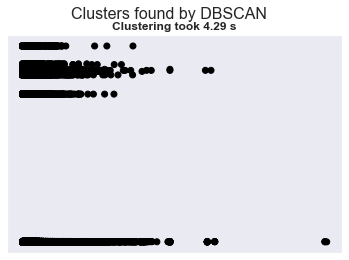

In [0]:
param_dict = {
    'eps': eps,
    'min_samples': min_samples,
    'metric': 'euclidean',
    'n_jobs': -1,
}

#plt.figure(figsize=(8,8))
plot_clusters(X_std, DBSCAN, (), param_dict)

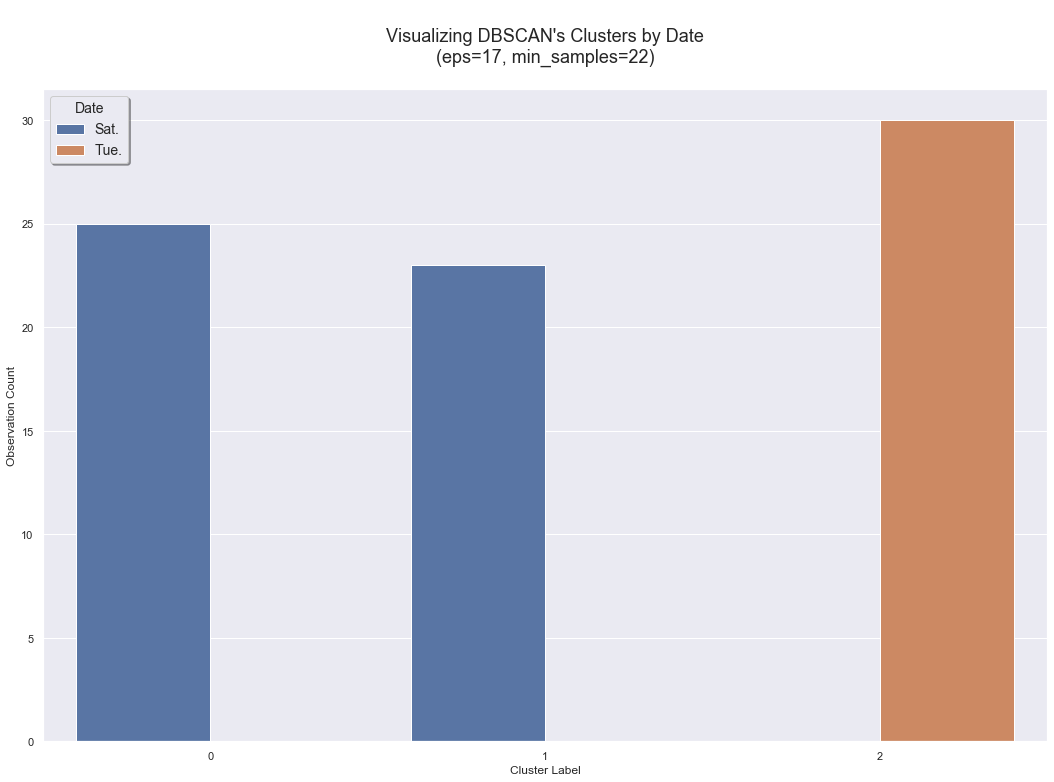

In [0]:
## Set up a DF for plotting
# Create a mask to allow only positive integers to pass
mask = (labels != -1)
df_data = pd.DataFrame()
df_data['Date'] = date_data[mask]
df_data['Labels'] = labels[mask]


## Plot the number of occurrences of each cluster for each Date
plt.figure(figsize=(18,12))
sns.countplot(x="Labels", hue='Date', data=df_data)
plt.xlabel("Cluster Label")
plt.ylabel("Observation Count")
plt.title(f"""
Visualizing DBSCAN's Clusters by Date
(eps={eps}, min_samples={min_samples})
""", fontsize=18)
legend = plt.legend(title='Date', loc='best', fontsize=14, shadow=True)
legend.get_title().set_fontsize(14)
plt.show();

This figure illustrates how the `DBSCAN` algorithm grouped the data to form three clusters. Most observations were marked as noise, but of the remaining trips, `Saturday` occupied the first two clusters while `Tuesday` occupied the third.
* Recall that, on average, `Saturday` had the longest delays while `Tuesday` had the shortest.
* Thus, these clusters might represent the collection of similarly delayed trains based on duration.

According to the Silhouette score, this implementation of `DBSCAN` performed poorly overall, but relatively better than the first one.

The ideal value for `min_samples` might be between the previous two values.
* As an attempt to improve robustness against noise and the score, $21$ and $20$ `min_samples` will be tested, respectively.

In [0]:
eps = 17
min_samples = 21

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=min_samples,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}, min_samples={min_samples}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=17, min_samples=21
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 5
Number of samples marked as noise: 213038
Clusters (noise labeled as -1): [-1  0  1  2  3  4]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.81609333690897


In [0]:
eps = 17
min_samples = 20

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=min_samples,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}, min_samples={min_samples}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=17, min_samples=20
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 7
Number of samples marked as noise: 212979
Clusters (noise labeled as -1): [-1  0  1  2  3  4  5  6]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.8402470566445556


Excluding noise:
* There were $5$ clusters for $min\_samples = 21$.
* There were $7$ clusters for $min\_samples = 20$.
* Again, almost all of the observations were labeled as noise ($>200k$).

Each Silhouette score is worse than that of $min\_samples = 22$.
* These results also imply that there shouldn't be $172$ clusters.

Overall, both implementations performed poorly; they were relatively better than the first one, but worse than the second set of input-parameters.

#### Thus, `min_samples = 22` will be used in the remaining steps.

### `eps` = 20

In [0]:
eps = 20

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=22,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=20
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 8
Number of samples marked as noise: 212928
Clusters (noise labeled as -1): [-1  0  1  2  3  4  5  6  7]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.8526845709343379


### `eps` = 22

In [0]:
eps = 22

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=22,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=22
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 13
Number of samples marked as noise: 212756
Clusters (noise labeled as -1): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.9232809316514823


### `eps` = 25

In [0]:
eps = 25

dbscan_cluster = DBSCAN(eps=eps,
                        min_samples=22,
                        metric='euclidean',
                        n_jobs=-1)

# Assign a cluster label to each observation. Label of noisy samples = -1
labels = dbscan_cluster.fit_predict(X_std)

print(f"Clustering with DBSCAN, eps={eps}")
print('-'*75)
print_cluster_details(X_std, labels)

Clustering with DBSCAN, eps=25
---------------------------------------------------------------------------
Estimated number of clusters (excluding noise): 17
Number of samples marked as noise: 212578
Clusters (noise labeled as -1): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Silhouette score: -0.9296240524779781


## Analysis Summary for `DBSCAN`

### Evaluation via Silhouette Coefficient

The silhouette score shows how well similar datapoints have been grouped together away from unlike datapoints.

The silhouette score is higher when a given datapoint exists closer to the centroid of its assigned cluster.
* The same should be true for an accumulated effect.
* The mean distance between the point of a given cluster and the points from the _nearest other cluster_ is larger when these two clusters are, overall, further apart or more distinguishable.

. . . . . . . . . .

For a point that exists **between** clusters, the silhouette score would decrease.
* Increasing the number of clusters will effectively begin **isolating each datapoint**. The spatial difference between a point's current cluster and that of the _nearest other cluster_ would decrease with more isolations.
* Thus, as $k$ increases, the silhouette score would decrease until some critical point.

---

The Silhouette coefficient for each `DBSCAN` implementation was negative.
* Typically, a coefficient closer to $-1$ indicates a very poor clustering performance.
* Thus, these results indicate that each variation assigned too many samples to the wrong cluster.

As `eps` increased, the number of clusters (excluding noise) also increased.
* At `(eps=17, min_samples=12)` and `(eps=25, min_samples=22)`, the number of clusters found were $172$ and $17$, respectively.
  * These two variations had the worst Silhouette scores at approximately $-0.96$ and $-0.93$, respectively.

The number of clusters ($3$) from `eps=17, min_samples=22` will be used in the next steps.
* This variation performed poorly overall, but its score was slightly better (the least negative) relative to the others.

---

Overall, according to the Silhouette scores, the `DBSCAN` implementations poorly clustered the data; this outcome could be the result of the following:
* Insufficient underlying patterns in the featured data.
* Overlapping, poorly-separated clusters.
* An unsatisfied assumption, perhaps regarding the following:
  * Cluster attributes (being convex, isotropic, etc.).
  * The order in which data or features are given to the algorithm.


When plotting the 2D projections:
* The few clusters shown were scattered and overlapping.
* Most of the data were labeled as noise.
* Even among similar data observations, the **size** and **shape** of each cluster was unclear.


>Perhaps the Silhouette score alone is an insufficient evaluation metric for this algorithm.

---

Next, `k-means` algorithm will be implemented.

## `K-Means`

This algorithm has been chosen because it has been known to be one of the fastest clustering algorithms available in practice.
* `K-Means` accepts a number of desired clusters as $k$,
* Calculates the distance for each datapoint relative to the position of each of the $k$ centroids,
* Assigns each point to its nearest centroid cluster,
* Then, computes new locations of each centroid by calculating the average coordinates of the data points in each cluster.

### Testing different values of `k` for the `K-Means` algorithm.

The best version of `DBSCAN` identified $3$ clusters.

Assuming that there are at least $3$ clusters, a range of values will be tested as respective inputs for the `K-Means` algorithm.

In [0]:
k_values = [3, 4, 7, 18]
k_label_results = dict()
k_s_score_results = dict()

print("Testing different values for k:")
for k in k_values:
  labels = KMeans(
      n_clusters=k,
      random_state=111,
      n_jobs=-1,
  ).fit_predict(X_std)
  s_score = silhouette_score(
      X_std, labels, metric='euclidean'
  )
  k_label_results['labels_k'+str(k)] = labels
  k_s_score_results['score_k'+str(k)] = s_score
  print('\n')
  print(f"Clustering with KMeans, k={k}")
  print(f"Silhouette score: {s_score}")

Testing different values for k:


Clustering with KMeans, k=3
Silhouette score: 0.5875917364610415


Clustering with KMeans, k=4
Silhouette score: 0.5697794562801087


Clustering with KMeans, k=7
Silhouette score: 0.5478048586935242


Clustering with KMeans, k=18
Silhouette score: 0.5243039735061048


As expected, the Silhouette score decreased as `k` increased.
* `K-Means` with $3$ clusters had the best score.

### Cluster Visualization

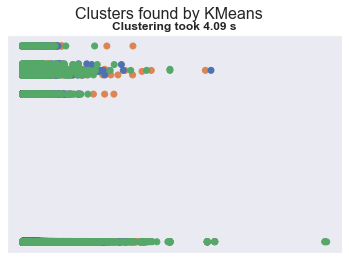

In [0]:
k = 3

param_dict = {
    'n_clusters': k,
    'random_state': 111,
    'n_jobs': -1,
}

#plt.figure(figsize=(8,8))
plot_clusters(X_std, KMeans, (), param_dict)

In [0]:
labels = k_label_results['labels_k3']

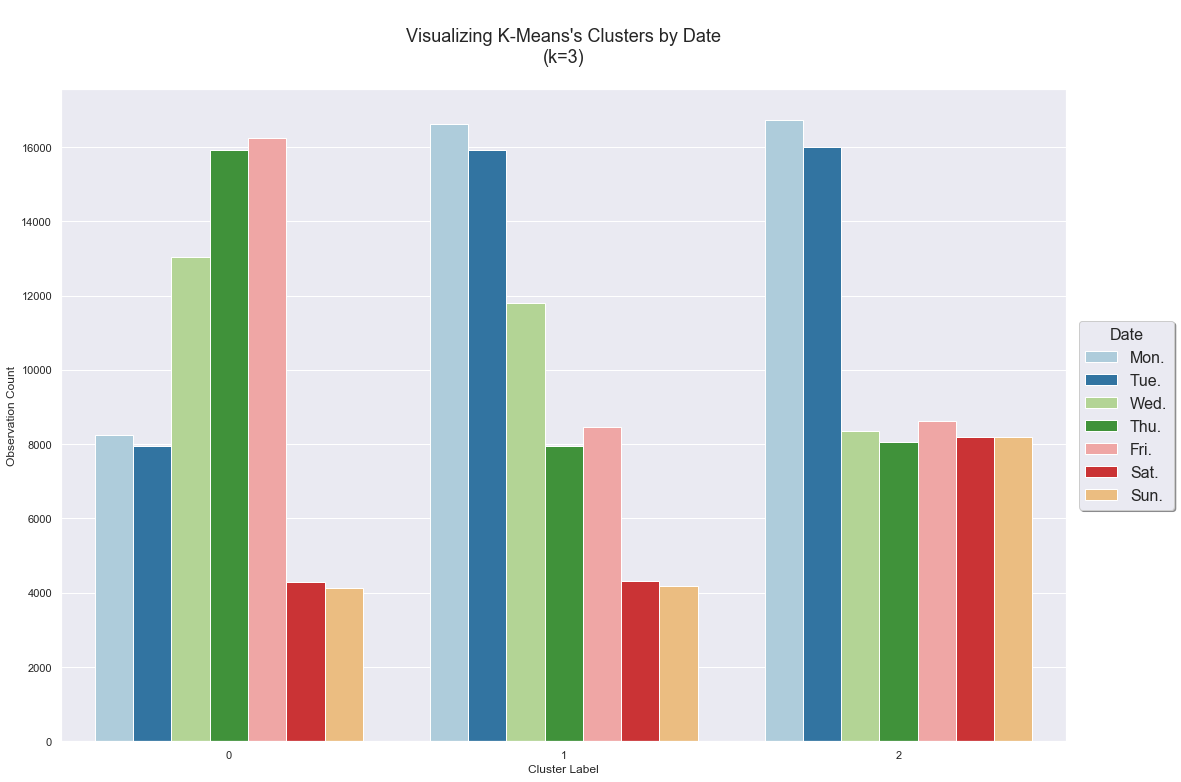

In [0]:
## Set up a DF for plotting
# Create a mask to allow only positive integers to pass
mask = (labels != -1)
df_data = pd.DataFrame()
df_data['Date'] = date_data[mask]
df_data['Labels'] = labels[mask]


## Plot the number of occurrences of each cluster for each Date
plt.figure(figsize=(18,12))
sns.countplot(x="Labels", hue='Date', data=df_data, palette='Paired')
plt.xlabel("Cluster Label")
plt.ylabel("Observation Count")
plt.title(f"""
Visualizing K-Means's Clusters by Date
(k={k})
""", fontsize=18)

# Customize Legend
lgd_handles, lgd_labels = ax.get_legend_handles_labels()
legend = plt.legend(
    handles=lgd_handles,
    labels=lgd_labels,
    loc='center left', 
    bbox_to_anchor=(1.005, 0.5), 
    ncol=1, 
    fontsize=16, 
    shadow=True, 
    title='Date', 
)
legend.get_title().set_fontsize(16)

plt.show();

### How many trips are there in each cluster with respect to weekdays?

This figure illustrates how the `K-Means` algorithm grouped the data into three clusters.
* `Wed.`, `Thu.`, and `Fri.` were most present in the first cluster.
* `Mon.`, `Tue.`, and `Wed.` were most present in the second cluster.
* `Mon.` and `Tue.` were most present in the third cluster.
* The `weekend` had the fewest trips in both the first and second clusters.
* The other five days had nearly the same amount of trips grouped in the third cluster.

Recall that, on average:
* `Saturday` had the longest delays.
* `Monday` had the second longest delays.
* `Tuesday` had the shortest delays.
* The other four days had similar delay durations.

. . . . . . . . . .

Based on the `DBSCAN` algorithm's results, trains might be clustered based on the average duration of delays.

However, the results from the `K-Means` algorithm suggest that trips could be clustered based on a combination of the following:
* Duration of delay
* Destination Names or respective train lines
* Number of stops for a particular train that has been in-service for multiple days
* Time of day for when the delay occurred

. . . . . . . . . .

**Important Notes:**
* Data from normal business hours (especially for the five `weekdays`) might be more consistent than the data surrounding emergencies or public events (typically at night, or on the weekend).
* Each cluster shows `Monday` and `Tuesday` with a similar number of trips.
* The following could explain how the trips were clustered:
  * The hours at which delays occurred could have been similar between `Monday` and `Tuesday`. These two days start a typical business week, and typically may have many people commuting around the same time, more so than the other weekdays.
  * Likewise, `Thursday` and `Friday` could have similarities as the last two days of the business week (like the occurrences of public events, fewer people rushing to get to work, etc.).
  * Perhaps `Wednesday` is shown in the middle of the aforementioned pairs (for the first two clusters) due to improvements of services or reductions in crowd congestion.

## Analysis Summary for `K-Means`

In [0]:
pairs = list(combinations(list(k_s_score_results.keys()), 2))
percent_diff = dict()

print(f"{len(pairs)} pairs")
for item in pairs:
  print(item)


print()
print('-'*75)
print()


for i in range(0, len(pairs)):
  s_a = abs(k_s_score_results[pairs[i][0]])
  s_b = abs(k_s_score_results[pairs[i][1]])
  percent_diff[str(pairs[i])] = 100 * (abs(s_a - s_b) / np.mean([s_a, s_b]))


print("""Analysis of K-Means
* Calculating the Relative Percent Difference (RPD) of Silhouette Scores
""")
for key,rpd in percent_diff.items():
  print(f"RPD for {key}: {rpd :.2f}%")

6 pairs
('score_k3', 'score_k4')
('score_k3', 'score_k7')
('score_k3', 'score_k18')
('score_k4', 'score_k7')
('score_k4', 'score_k18')
('score_k7', 'score_k18')

---------------------------------------------------------------------------

Analysis of K-Means
* Calculating the Relative Percent Difference (RPD) of Silhouette Scores

RPD for ('score_k3', 'score_k4'): 3.08%
RPD for ('score_k3', 'score_k7'): 7.01%
RPD for ('score_k3', 'score_k18'): 11.38%
RPD for ('score_k4', 'score_k7'): 3.93%
RPD for ('score_k4', 'score_k18'): 8.31%
RPD for ('score_k7', 'score_k18'): 4.38%


A Silhouette coefficient closer to $1$ indicates a very good clustering performance.
* The Silhouette coefficient for `k=3` was the highest of the four implementations.
  * The next best score was that of `k=4`.
  * The relative percent difference in scores between `k=3` and `k=4` was $3.08$%.
  * The relative percent difference in scores between `k=3` and `k=18` was $11.38$%.
* Each score for the `K-Means` implementations was positive; however, the `k=3` variation grouped the data better than the others.

>When plotting the 2D projections, most of the visible clusters were scattered and overlapping.<br>
The **size** and **shape** of each cluster remains unclear.

## 3) Cluster Visualization through Dimensionality Reduction

The results from both algorithms indicate that the clusters are scattered and overlapping.

To see the clusters more easily, 2D projections of `K-Means (k=3)` will now be created through `PCA` and `t-NSE`.
* For visualization purposes, cluster assignments will be plotted against two components.
* However, note that the actual solutions are based on all features in the featured data.

In [0]:
labels_km = k_label_results['labels_k3']

## `PCA`

In [0]:
components = 2
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_std)

print(f"Confirm Updates from PCA (components = {components})")
print(f"Old Shape: {X_std.shape}")
print(f"New Shape: {X_pca.shape}")

print()
print('-'*70)
print()

print('''Finding Collinearity among Features

The percentage % of "total variance in the dataset" captured
and explained by each principal component:
''')
print(pca.explained_variance_ratio_ * 100)
print(f"Est. Total: {sum(pca.explained_variance_ratio_ * 100) :0.0f}%")

Confirm Updates from PCA (components = 2)
Old Shape: (213163, 10)
New Shape: (213163, 2)

----------------------------------------------------------------------

Finding Collinearity among Features

The percentage % of "total variance in the dataset" captured
and explained by each principal component:

[9.99889509e+01 6.97200177e-03]
Est. Total: 100%


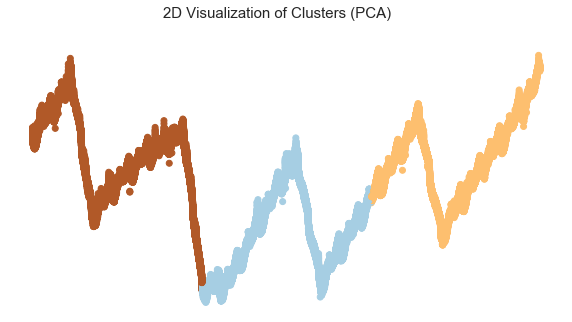

In [0]:
plt.figure(figsize=(10,5))
plt.suptitle("2D Visualization of Clusters (PCA)", fontsize=15)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=vectorizer(labels_km))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap=plt.cm.Paired)
plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show();

## `t-SNE`

### `perplexity` = 30

In [0]:
perplexity = 30

tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, verbose=0)
tsne_results = tsne.fit_transform(X_std)

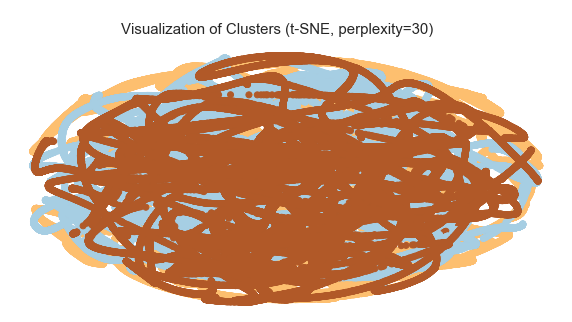

In [0]:
plt.figure(figsize=(10,5))
plt.suptitle(f"""
Visualization of Clusters (t-SNE, perplexity={perplexity})
""", fontsize=15)
plt.scatter(tsne_results[:,0], tsne_results[:,1],
            c=labels_km, cmap=plt.cm.Paired)
plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show();

### `perplexity` = 40

In [0]:
perplexity = 40

tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, verbose=0)
tsne_results = tsne.fit_transform(X_std)

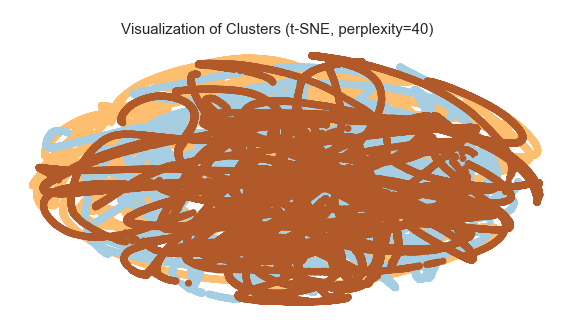

In [0]:
plt.figure(figsize=(10,5))
plt.suptitle(f"""
Visualization of Clusters (t-SNE, perplexity={perplexity})
""", fontsize=15)
plt.scatter(tsne_results[:,0], tsne_results[:,1],
            c=labels_km, cmap=plt.cm.Paired)
plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show();

### `perplexity` = 50

In [0]:
perplexity = 50

tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, verbose=0)
tsne_results = tsne.fit_transform(X_std)

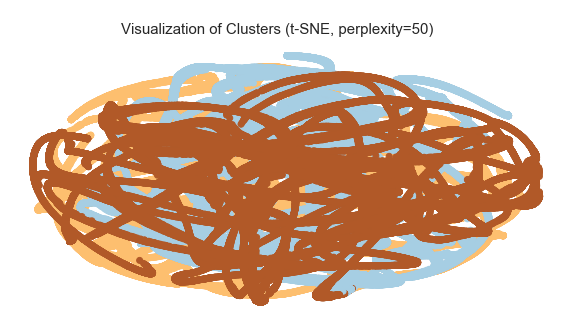

In [0]:
plt.figure(figsize=(10,5))
plt.suptitle(f"""
Visualization of Clusters (t-SNE, perplexity={perplexity})
""", fontsize=15)
plt.scatter(tsne_results[:,0], tsne_results[:,1],
            c=labels_km, cmap=plt.cm.Paired)
plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show();

## Analysis Summary for `PCA` and `t-SNE`

Compared to the original representations, `PCA` and `t-SNE` had the most distinguishable, well-separated clusters in 2D.

All $3$ clusters are easily distinguishable because of the dimensionality reduction properties of both `PCA` and `t-SNE`.
* Each cluster is clearly defined through the `PCA` representation.
  * Similar to aforementioned remarks, the overall shape might embody the trends in train performances across the seven days of the week.
  * Consider, for example, the rise and fall of delay times outlined per day. Perhaps the shape corresponds to a starting mark of Sunday, then rises on Monday, drops on Tuesday, oscillates during the weekdays, and rises again on Saturday.
  * This, of course, is difficult to prove without further exploration.
  * For now, the focus will remain on the visibility of clusters.
* Some of the clusters shown through the `t-SNE` variations are overlapping, but each cluster is still clearly visible.
  * The visibility of each cluster changed as perplexity changed.
  * Each `t-SNE` figure resembles a screenshot of a 3D image containing interwoven parts.

For `t-SNE`, both **curvature** and **overlap** of the clusters were shown, possibly from above, similar to a _birds-eye_ perspective.

# Discussion

---

## Finding `k`, the number of clusters.

* `DBSCAN` suggested that there were $3$ clusters that the data could be grouped into.
* A range, including that value, was passed into `K-Means` (k = 3, 4, 7, 18).
* The Silhouette score was expected to decrease with larger `k` values, and it did.
* `K-Means (k = 3)` had the highest score, making it the best implementation.
  * These two algorithms provided a good work-flow of determining the number of clusters, but could undergo improvements to improve the score; alternatively, other metrics could be used for evaluating the performances of these clustering algorithms.

. . . . . . . . . .

Further research is needed regarding the following to discover more attributes by which the data can be grouped:
* Ridership per train line or destination.
* Delays due to overcrowded trains under normal conditions.
* Delays due to service malfunctions or accidents.
* Delays due to weather patterns.

---

## Using the Silhouette coefficient to evaluate the performance of the clustering algorithms.

* Although `k=3` for `K-Means` had the highest score, there was a $3.08$% relative difference in the Silhouette score for `k=3` and that of `k=4`.
* This difference was the smallest relative to that of the other pairs.
* Thus, the data could be grouped into $3$ or $4$ clusters, but each algorithm performed the best with $3$ clusters.
* When viewing the clusters with respect to the `seven days of the week`, the number of trips varied, but the trips were grouped through similarities found in `groups of weekdays` and `groups of weekends` across both `DBSCAN` and `K-Means`.
* The results of both algorithms indicated that the clusters were likely overlapping, which may have inherently lowered the Silhouette scores.
* _Dimensionality Reduction_ through `PCA` and `t-SNE` provided the best 2D projections of the `K-Means (k=3)` clusters.
  * Through these two techniques, all $3$ clusters were visibly distinguishable.

---

## Next Steps for Further Research

1. Explore various aspects of emergencies, public events, and weather data for the month of April, both in 2019 and 2020.
1. Investigate how NJ Transit rail-data have changed from April of 2019 through May of 2020 (to find more patterns amid the pandemic).
1. Use clustering algorithms with additional data (more customer records, more factors, etc.) to group by more underlying patterns.
1. Use supervised machine learning models to predict which trains will be delayed or canceled.
1. Expand on evaluation metrics and tools for all algorithms used.
1. Based on those research results, discuss the newly discovered patterns surrounding train delays.